In [2]:
from landlab.io import read_esri_ascii
import landlab
import matplotlib.pyplot as plt
import statistics
import numpy as np
%matplotlib inline

In [8]:
(dem_crop, _) = read_esri_ascii("./save_asc/testes/ascii_cropadotest.asc", name="topographic__elevation")

(dem_fse_uplift_1_10, _) = read_esri_ascii("./save_asc/uplift_fast_scape/ascii_fse_uplift_1_18_8_1000_topographic__elevation.asc", name="topographic__elevation")
(dem_fse_uplift_1_20, _) = read_esri_ascii("./save_asc/uplift_fast_scape/ascii_fse_uplift_1_18_8_2000_topographic__elevation.asc", name="topographic__elevation")
(dem_fse_uplift_1_40, _) = read_esri_ascii("./save_asc/uplift_fast_scape/ascii_fse_uplift_1_18_8_4000_topographic__elevation.asc", name="topographic__elevation")

(dem_fse_uplift_1_60, _) = read_esri_ascii("./save_asc/uplift_fast_scape/ascii_fse_uplift_1_18_8_6000_topographic__elevation.asc", name="topographic__elevation")
(dem_fse_uplift_1_80, _) = read_esri_ascii("./save_asc/uplift_fast_scape/ascii_fse_uplift_1_18_8_8000_topographic__elevation.asc", name="topographic__elevation")
#(dem_fse_uplift_1_100, _) = read_esri_ascii("./save_asc/uplift_fast_scape/ascii_fse_uplift_1_18_8_10000_topographic__elevation.asc", name="topographic__elevation")


## teste 1 fast escape 
 ### uplift_rate = 0.0001
 parametros: 
 (mg, K_sp=0.0004, m_sp=0.5, n_sp=1.0, threshold_sp= 0.0) 
  com time step =1000

In [10]:
dems = [dem_fse_uplift_1_10, dem_fse_uplift_1_20, dem_fse_uplift_1_40, dem_fse_uplift_1_60, dem_fse_uplift_1_80]

In [11]:
def mean_top(dem):
    arr = dem.at_node['topographic__elevation']
    return np.mean(arr)    

In [12]:
means = list(map(mean_top, dems))
means

[155.97536249999516,
 255.97536249998976,
 455.97536250003475,
 655.97536250008045,
 855.97536250012536]

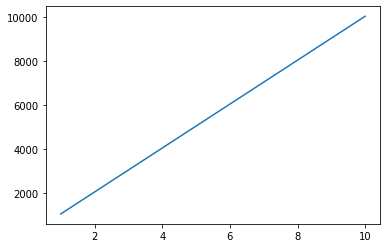

In [70]:
avgs = means
vetor_eixo = [ 1, 2, 4, 6, 8, 10] 
plt.plot(vetor_eixo, avgs)

In [20]:
avgs

[155.97536249999516,
 255.97536249998976,
 455.97536250003475,
 655.97536250008045,
 855.97536250012536]

## teste 2 fast escape 
 ### uplift_rate = 0.001
 parametros: 
 (mg, K_sp=0.0004, m_sp=0.5, n_sp=1.0, threshold_sp= 0.0) 
  com time step =1000

In [93]:
def get_dem(num_test):
    (dem_10, _) = read_esri_ascii("./save_asc/uplift_fast_scape/ascii_fse_uplift_"+str(num_test)+"_18_8_10_topographic__elevation.asc", name="topographic__elevation")
    (dem_20, _) = read_esri_ascii("./save_asc/uplift_fast_scape/ascii_fse_uplift_"+str(num_test)+"_18_8_20_topographic__elevation.asc", name="topographic__elevation")
    (dem_40, _) = read_esri_ascii("./save_asc/uplift_fast_scape/ascii_fse_uplift_"+str(num_test)+"_18_8_40_topographic__elevation.asc", name="topographic__elevation")

    (dem_60, _) = read_esri_ascii("./save_asc/uplift_fast_scape/ascii_fse_uplift_"+str(num_test)+"_18_8_60_topographic__elevation.asc", name="topographic__elevation")
    (dem_80, _) = read_esri_ascii("./save_asc/uplift_fast_scape/ascii_fse_uplift_"+str(num_test)+"_18_8_80_topographic__elevation.asc", name="topographic__elevation")
    (dem_100, _) = read_esri_ascii("./save_asc/uplift_fast_scape/ascii_fse_uplift_"+str(num_test)+"_18_8_100_topographic__elevation.asc", name="topographic__elevation")
     
    return [dem_10, dem_20, dem_40, dem_60, dem_80, dem_100]

### teste 3 fast escape

### uplift_rate = 0.002

parametros: (mg, K_sp=0.0004, m_sp=0.5, n_sp=1.0, threshold_sp= 0.0) com time step =1000

In [109]:
def get_dem_folder(folder_name):
    loops = [1000, 2000, 4000, 6000, 8000, 10000]
    dems = []
    folder_parent = "save_asc"
    
    for loop in loops:
        file_name = str(loop) + "_topographic__elevation.asc"
        (dem, _) = read_esri_ascii("./{folder_parent}/{folder_name}/{file_name}".format(folder_parent=folder_parent, folder_name=folder_name, file_name=file_name), name="topographic__elevation")
        dems.append(dem)
     
    return dems

In [110]:
dems = get_dem_folder("fast_scap_uplift_0,002_18_8")
# dems_sed = get_dem("sed_up")

In [111]:
#dems = get_dem(2)

In [112]:
means = []
for dem in dems:
    means.append(mean_top(dem))
    

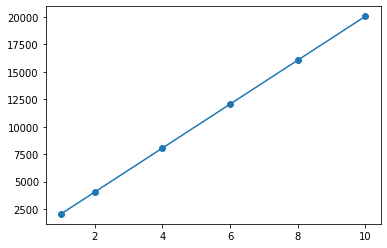

In [113]:
vetor_eixo = [ 1, 2, 4, 6, 8, 10] 
plt.plot(vetor_eixo, means,  marker='o')

In [101]:
dems[5].at_node['topographic__elevation'][400:410]

array([ 503.        ,  178.00003077,  178.00000586,  178.00002129,
        178.00000433,  178.00000413,  178.00000322,  178.00000014,
        178.0000177 ,  178.00001998])

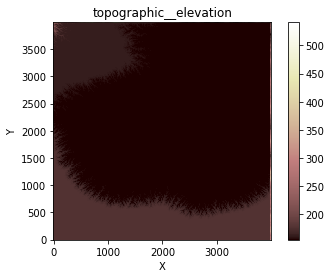

In [98]:
landlab.plot.imshow.imshow_grid_at_node(dems[5],'topographic__elevation')